<a href="https://colab.research.google.com/github/septianidn/APM_11/blob/main/Pertemuan%207/FBGrowrth_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Installing requirements manual

In [76]:
%pip install pyECLAT
%pip install apyori
%pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### EDA

Importing library

In [98]:
from pyECLAT import ECLAT
from apyori import apriori
from numpy import array
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Importing dataset

In [99]:
data = pd.read_csv('market_basket_optimisation.csv' ,header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Deskripsi info dataframe

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [101]:
data.shape

(7501, 20)

In [102]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [103]:
data.describe(include = 'object')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


Menangani data dengan missing value

In [104]:
data[pd.notnull(data.loc[:,0:0])]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
 data.iloc[:,0].value_counts(ascending=False).head(20)

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
french fries         244
herb & pepper        232
ground beef          218
tomatoes             212
milk                 181
escalope             143
fresh tuna           129
red wine             123
ham                  120
cake                  98
Name: 0, dtype: int64

In [106]:
data.fillna(0,inplace=True)

Menyimpan data ke dalam list array transaction

In [107]:
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append([ data.values[i,j] for j in range(0,1) if data.values[i,j]!='0'])

transaction = np.array(transaction)

df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1

Urutkan berdasarkan 20 item yang paling banyak diminta dalam kumpulan data

In [108]:
df_table= df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

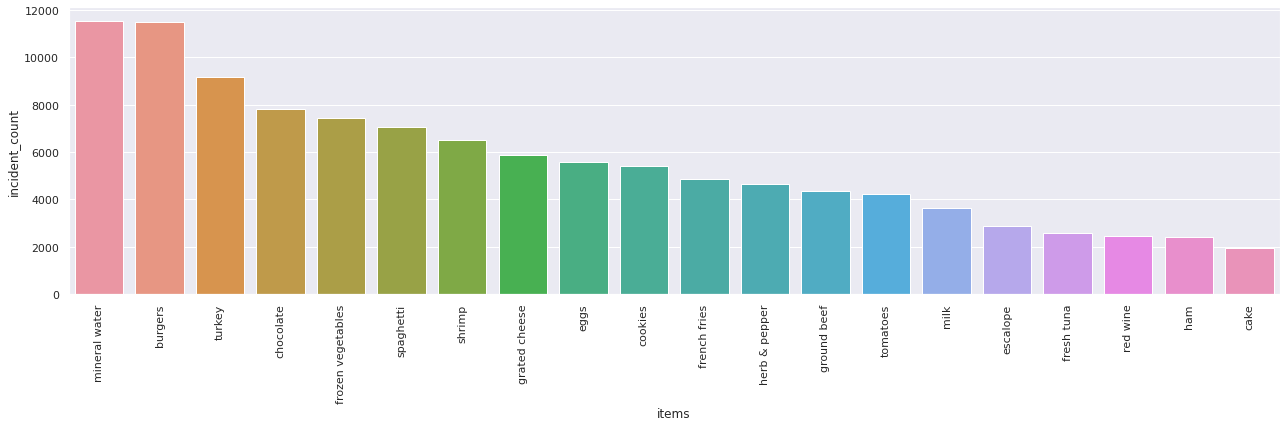

In [109]:
sns.set(font_scale=0.4) 
sns.set(rc={'figure.figsize':(21.7,5.27)})
plt.xticks(rotation=90)
sns.barplot(x="items",y="incident_count",data=df_table.head(20));

Mengubah data menjadi list array dan menyimpan dalam variabel arr

In [110]:
arr = []
for i in range(0,len(data)):
    arr.append([str( data.values[i,j]) for j in range(0,20) if str(data.values[i,j])!='0'])
arr = np.array(arr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Mengubah dataframe menjadi matriks format tabular

In [111]:
te = TransactionEncoder()
data = te.fit_transform(arr)
data = pd.DataFrame(data, columns = te.columns_)

data.shape

(7501, 120)

In [112]:
data=data.astype('int')

Tampilkan dataset yang sebelumnya sudah kita ubah kedalam format tabular

In [113]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Mengecek kembali informasi dataframe terakhir

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Columns: 120 entries,  asparagus to zucchini
dtypes: int64(120)
memory usage: 6.9 MB


#### FPGrowth

Membuat model FBGrowth

In [115]:
min_support = 7/len(arr) 

fpgrowth_data = fpgrowth(data, min_support=min_support, use_colnames = True)
fpgrowth_data.sort_values(['support'], ascending=False)

/usr/local/lib/python3.7/dist-packages/mlxtend/frequent_patterns/fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
0,0.238368,(mineral water)
20,0.179709,(eggs)
33,0.174110,(spaghetti)
28,0.170911,(french fries)
39,0.163845,(chocolate)
...,...,...
7022,0.000933,"(french fries, mineral water, brownies, eggs)"
7019,0.000933,"(french fries, chocolate, brownies, pancakes)"
7018,0.000933,"(brownies, chocolate, mineral water, eggs)"
4966,0.000933,"(soup, mineral water, spaghetti, red wine)"


Menampilkan hasil Basket Market model FB Growth

In [116]:
association_rules(fpgrowth_data, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(low fat yogurt, frozen vegetables, burgers)",(mineral water),0.001333,0.238368,0.001067,0.800000,3.356152,0.000749,3.808159
1,"(french fries, low fat yogurt, spaghetti, eggs)",(milk),0.001333,0.129583,0.000933,0.700000,5.401955,0.000760,2.901391
2,"(french fries, low fat yogurt, eggs, milk)",(spaghetti),0.001333,0.174110,0.000933,0.700000,4.020444,0.000701,2.752966
3,"(frozen vegetables, mineral water, eggs, low f...",(milk),0.001466,0.129583,0.001067,0.727273,5.612421,0.000876,3.191530
4,"(frozen vegetables, milk, eggs, low fat yogurt)",(mineral water),0.001466,0.238368,0.001067,0.727273,3.051047,0.000717,2.792650
...,...,...,...,...,...,...,...,...,...
399,"(bacon, pancakes)",(spaghetti),0.002133,0.174110,0.001733,0.812500,4.666587,0.001362,4.404746
400,"(fromage blanc, cooking oil)",(mineral water),0.001466,0.238368,0.001200,0.818182,3.432428,0.000850,4.188975
401,"(ground beef, green beans)",(spaghetti),0.001466,0.174110,0.001067,0.727273,4.177085,0.000811,3.028263
402,"(green beans, pancakes)",(spaghetti),0.001333,0.174110,0.000933,0.700000,4.020444,0.000701,2.752966
